In [1]:
from pathlib import Path
import pandas as pd
from datetime import datetime

data_path = Path('/home/engaclew/DATA/neurogen/L3_HIPAA_LENA_cleaned')
recordings = pd.read_csv(data_path / 'metadata' / 'recordings.csv')
children = pd.read_csv(data_path / 'metadata' / 'children.csv')
recordings = recordings.merge(children, on='child_id', how='left')

# 1. Compute age at time of recording
def diff_month(row):
    d1 = datetime.strptime(row['date_iso'], '%Y-%m-%d')
    d2 = datetime.strptime(row['child_dob'], '%Y-%m-%d')
    return (d1.year - d2.year) * 12 + d1.month - d2.month + (d1.day - d2.day)/30 
recordings['age'] = recordings.apply(lambda row: diff_month(row), axis=1)
recordings['age'] = recordings['age'].astype(float)

# 2. Excluding 'environmental_risk' and 'autism_spectrum_disorder' because we have only 2 recordings for these groups
recordings = recordings[~recordings['group_id'].isin(['environmental_risk', 'autism_spectrum_disorder'])]
recordings['group_id'] = recordings['group_id'].apply(lambda x: '_'+x if x != 'low_risk' else x)

# 3. Excluding recordings that are too short
to_exclude = ['20221018_135301_043300_3.wav', '20181207_135636_022875_1.wav', '20190404_133218_024880_2.wav', '20220830_095853_022873_1.wav']
recordings = recordings[~recordings['recording_filename'].isin(to_exclude)]

In [2]:
recordings = recordings.sort_values('duration')
recordings.head(50)

,child_id,experiment_x,date_iso,start_time,recording_device_type,recording_filename,duration,its_filename,experiment_y,child_dob,child_sex,group_id,age
4,3991,neurogen,2021-08-26,5:25:09,lena,20210909_113112_043299_3.wav,9798375,20210909_113112_043299_3.its,neurogen,2017-09-30,m,_down_syndrome,46.866667
5,3071,neurogen,2018-12-04,10:05:42,lena,20181207_135636_022875_3.wav,10363187,20181207_135636_022875_3.its,neurogen,2016-08-13,f,_angelman_syndrome,27.700000
6,4021,neurogen,2019-10-07,7:23:56,lena,20191015_104144_024880_2.wav,11526750,20191015_104144_024880_2.its,neurogen,2018-04-07,m,_down_syndrome,18.000000
7,3251,neurogen,2018-04-16,5:53:04,lena,20180417_111117_022874.wav,11775687,20180417_111117_022874.its,neurogen,2018-01-09,f,low_risk,3.233333
8,4021,neurogen,2019-10-07,1:50:25,lena,20191015_104144_024880_3.wav,12207187,20191015_104144_024880_3.its,neurogen,2018-04-07,m,_down_syndrome,18.000000
9,3841,neurogen,2021-01-22,9:02:59,lena,20210127_105355_024882_1.wav,14178000,20210127_105355_024882_1.its,neurogen,2016-12-02,m,_angelman_syndrome,49.666667
10,3841,neurogen,2021-01-22,3:58:52,lena,20210127_105355_024882_2.wav,14698562,20210127_105355_024882_2.its,neurogen,2016-12-02,m,_angelman_syndrome,49.666667
11,5441,neurogen,2020-12-19,3:44:38,lena,20210112_153555_024882_3.wav,14760125,20210112_153555_024882_3.its,neurogen,2019-05-20,f,low_risk,18.966667
12,3071,neurogen,2018-12-04,2:55:50,lena,20181207_135636_022875_4.wav,14995187,20181207_135636_022875_4.its,neurogen,2016-08-13,f,_angelman_syndrome,27.700000
13,4001,neurogen,2019-09-17,6:57:20,lena,20191004_125707_025480_2.wav,16527812,20191004_125707_025480_2.its,neurogen,2018-02-13,f,_down_syndrome,19.133333


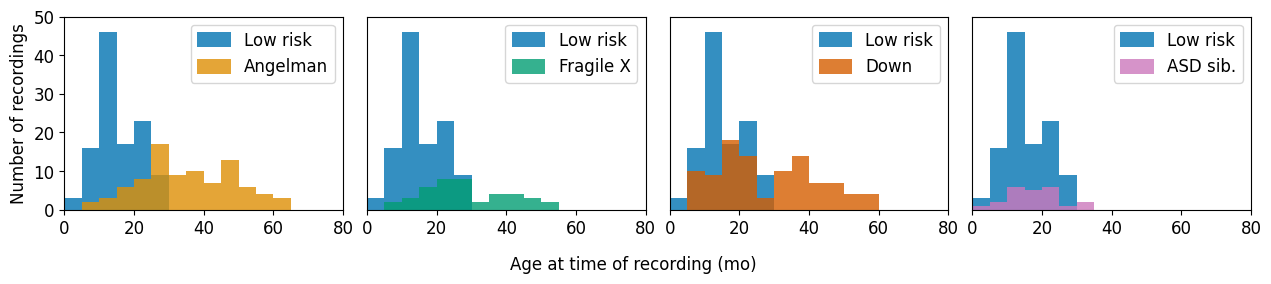

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':1})
cm = 1/2.54

fig, ax = plt.subplots(1,4, figsize=(32*cm,6*cm), constrained_layout=True)

group_labels = {
    'low_risk': 'Low risk',
    '_angelman_syndrome': 'Angelman',
    '_fragile_x_syndrome': 'Fragile X',
    '_down_syndrome': 'Down',
    '_autism_sibling': 'ASD sib.'
}

colors = colors = sns.color_palette('colorblind')[:len(group_labels)]
low_risk = recordings[recordings['group_id'] == 'low_risk']
for i, (group_id, label) in enumerate(group_labels.items()):
    if i == 0:
        continue
    sub = recordings[recordings['group_id'] == group_id]
    ax[i-1].hist(low_risk['age'], label='Low risk', alpha=0.8, color=colors[0], bins=range(0, 70, 5))
    ax[i-1].hist(sub['age'], label=label, alpha=0.8, color=colors[i], bins=range(0, 70, 5))
    ax[i-1].legend()
    if i-1 == 0:
        yticks = ax[i-1].get_yticks()
        xticks = ax[i-1].get_xticks()
        ax[i-1].set_ylabel('Number of recordings')
    else:
        ax[i-1].get_yaxis().set_visible(False)
    ax[i-1].set_yticks(yticks)
    ax[i-1].set_xticks(xticks)
    ax[i-1].set_xlim(0, xticks[-1])

fig.text(0.4, -0.12, 'Age at time of recording (mo)')
plt.savefig('/home/engaclew/neurogen/results/summary/age_per_group.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

def select_age_matched_groups(df, n_per_group=10, max_age_diff=3, random_state=42, n_attempts=100):
    """
    Select age-matched children across groups with improved matching criteria.
    Keeps only one recording per child.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Input dataframe containing 'child_id', 'group_id' and 'age' columns
    n_per_group : int
        Number of children to select per group
    max_age_diff : float
        Maximum allowed difference in mean age between any two groups
    n_attempts : int
        Number of attempts to find a good match
    random_state : int
        Random seed for reproducibility
    
    Returns:
    --------
    pandas DataFrame
        Selected age-matched children with one recording per child
    """
    np.random.seed(random_state)
    
    # Get mean age per child
    child_data = df.groupby(['child_id', 'group_id'])['age'].mean().reset_index()
    groups = child_data['group_id'].unique()
    
    best_selection = None
    best_age_diff = float('inf')
    
    for attempt in range(n_attempts):
        # Randomly select reference group
        reference_group = np.random.choice(groups)
        
        # Select random sample from reference group
        ref_samples = child_data[child_data['group_id'] == reference_group].sample(n=n_per_group)
        ref_ages = ref_samples['age'].values
        
        # Initialize results with reference group children
        selected_child_ids = list(ref_samples['child_id'])
        
        # For each other group, find best matching subjects
        matched_ages = [ref_ages]
        failed_matching = False
        
        for group in groups:
            if group == reference_group:
                continue
                
            group_data = child_data[child_data['group_id'] == group]
            
            # Calculate age distances
            distances = cdist(
                ref_ages.reshape(-1, 1),
                group_data['age'].values.reshape(-1, 1)
            )
            
            # Select best matches using Hungarian algorithm
            from scipy.optimize import linear_sum_assignment
            _, col_ind = linear_sum_assignment(distances)
            
            # Get the selected ages
            selected_ages = group_data['age'].iloc[col_ind[:n_per_group]].values
            matched_ages.append(selected_ages)
            
            # Get the child_ids
            selected_child_ids.extend(group_data['child_id'].iloc[col_ind[:n_per_group]])
        
        # Calculate maximum difference in mean ages between any two groups
        group_means = [ages.mean() for ages in matched_ages]
        max_mean_diff = max(abs(a - b) for i, a in enumerate(group_means) 
                          for b in group_means[i+1:])
        
        # Update best selection if this is better
        if max_mean_diff < best_age_diff:
            best_age_diff = max_mean_diff
            best_selection = selected_child_ids
            
        # If we found a good enough match, stop early
        if max_mean_diff <= max_age_diff:
            break
    
    # Get all recordings for selected children
    selected = df[df['child_id'].isin(best_selection)].copy()
    
    # Keep only one recording per child (the one closest to the mean age for that group)
    group_means = child_data[child_data['child_id'].isin(best_selection)].groupby('group_id')['age'].mean()
    
    def select_best_recording(group):
        target_age = group_means[group['group_id'].iloc[0]]
        return group.iloc[(group['age'] - target_age).abs().argmin()]
    
    selected = selected.groupby('child_id').apply(select_best_recording).reset_index(drop=True)
    
    # Print summary statistics
    print("\nUnique children per group:")
    print(selected.groupby('group_id')['child_id'].nunique())
    
    print(f"\nBest maximum mean age difference: {best_age_diff:.2f} months")
    
    print("\nAge statistics per group:")
    age_stats = selected.groupby('group_id')['age'].agg(['mean', 'std', 'min', 'max', 'count'])
    print(age_stats)
    
    return selected

# Use the function
matched_groups = select_age_matched_groups(recordings, n_per_group=10, max_age_diff=2, n_attempts=1000, random_state=1)
print("Number of recordings", len(matched_groups))
print("Number of children", len(matched_groups['child_id'].unique()))


Unique children per group:
group_id
_angelman_syndrome     10
_autism_sibling        10
_down_syndrome         10
_fragile_x_syndrome    10
low_risk               10
Name: child_id, dtype: int64

Best maximum mean age difference: 1.77 months

Age statistics per group:
                          mean       std        min        max  count
group_id                                                             
_angelman_syndrome   22.080000  3.892830  18.766667  31.000000     10
_autism_sibling      21.040000  4.778186  13.566667  31.100000     10
_down_syndrome       22.006667  4.450268  15.766667  31.700000     10
_fragile_x_syndrome  21.453333  3.477377  15.333333  27.700000     10
low_risk             20.453333  4.867483  13.266667  26.066667     10
Number of recordings 50
Number of children 50


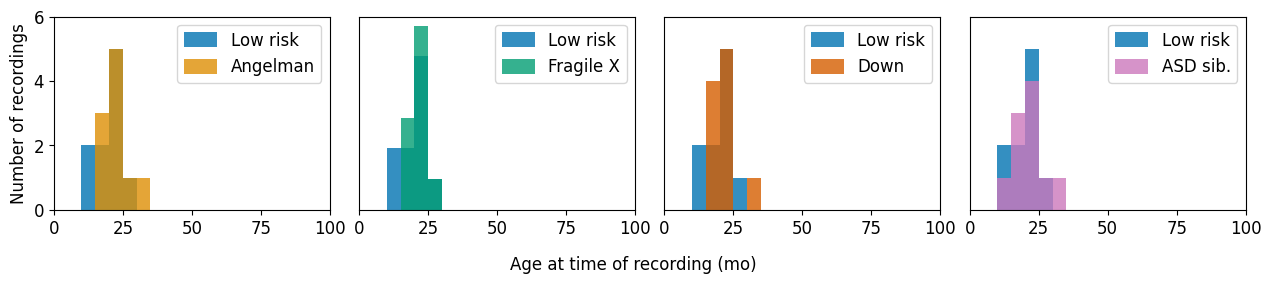

In [5]:
fig, ax = plt.subplots(1,4, figsize=(32*cm,6*cm), constrained_layout=True)

group_labels = {
    'low_risk': 'Low risk',
    '_angelman_syndrome': 'Angelman',
    '_fragile_x_syndrome': 'Fragile X',
    '_down_syndrome': 'Down',
    '_autism_sibling': 'ASD sib.'
}

colors = colors = sns.color_palette('colorblind')[:len(group_labels)]
low_risk = matched_groups[matched_groups['group_id'] == 'low_risk']
for i, (group_id, label) in enumerate(group_labels.items()):
    if i == 0:
        continue
    sub = matched_groups[matched_groups ['group_id'] == group_id]
    ax[i-1].hist(low_risk['age'], label='Low risk', alpha=0.8, color=colors[0], bins=range(0, 80, 5))
    ax[i-1].hist(sub['age'], label=label, alpha=0.8, color=colors[i], bins=range(0, 80, 5))
    ax[i-1].legend()
    if i-1 == 0:
        yticks = ax[i-1].get_yticks()
        xticks = ax[i-1].get_xticks()
        ax[i-1].set_ylabel('Number of recordings')
    else:
        ax[i-1].get_yaxis().set_visible(False)
    ax[i-1].set_yticks(yticks)
    ax[i-1].set_xticks(xticks)
    ax[i-1].set_xlim(0, xticks[-1])

fig.text(0.4, -0.12, 'Age at time of recording (mo)')
plt.savefig('/home/engaclew/neurogen/results/summary/age_per_group_after_match.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
for group_id in matched_groups['group_id'].unique():
    print("nb. fem", group_id, len(matched_groups[(matched_groups['group_id'] == group_id) & (matched_groups['child_sex'] == 'f')]))

matched_groups['duration'] = matched_groups['duration'].astype(float)
print("Min dur.", matched_groups['duration'].min() / (1000*60*60))
print("Min dur.", matched_groups['duration'].max() / (1000*60*60))

nb. fem low_risk 4
nb. fem _angelman_syndrome 6
nb. fem _fragile_x_syndrome 3
nb. fem _down_syndrome 4
nb. fem _autism_sibling 7
Min dur. 4.591058888888889
Min dur. 16.0


In [9]:
matched_groups = matched_groups.sort_values('duration')
matched_groups.head(50)

,child_id,experiment_x,date_iso,start_time,recording_device_type,recording_filename,duration,its_filename,experiment_y,child_dob,child_sex,group_id,age
13,4001,neurogen,2019-09-17,6:57:20,lena,20191004_125707_025480_2.wav,16527812.0,20191004_125707_025480_2.its,neurogen,2018-02-13,f,_down_syndrome,19.133333
10,3931,neurogen,2020-03-04,6:29:12,lena,20200312_145204_022874.wav,20150812.0,20200312_145204_022874.its,neurogen,2018-05-17,m,_down_syndrome,21.566667
26,6371,neurogen,2022-05-08,9:19:32,lena,20220513_113018_024879_2.wav,25847750.0,20220513_113018_024879_2.its,neurogen,2020-05-12,m,_fragile_x_syndrome,23.866667
14,4011,neurogen,2020-03-22,6:51:20,lena,20200414_125938_024878_2.wav,34729375.0,20200414_125938_024878_2.its,neurogen,2018-07-08,f,_down_syndrome,20.466667
33,6921,neurogen,2023-02-20,7:28:16,lena,20230301_083834_024880_2.wav,35806000.0,20230301_083834_024880_2.its,neurogen,2021-02-14,m,low_risk,24.200000
21,5901,neurogen,2020-12-08,9:53:33,lena,20201210_142957_025480_2.wav,37306562.0,20201210_142957_025480_2.its,neurogen,2019-02-23,m,_fragile_x_syndrome,21.500000
31,6731,neurogen,2023-10-20,9:11:11,lena,20231025_115855_045737_2.wav,39369562.0,20231025_115855_045737_2.its,neurogen,2021-10-22,m,low_risk,23.933333
44,7201,neurogen,2022-10-11,10:19:01,lena,20221018_135301_043300_4.wav,40018062.0,20221018_135301_043300_4.its,neurogen,2020-08-07,f,_autism_sibling,26.133333
25,6261,neurogen,2021-04-24,9:05:34,lena,20210504_102146_025480_2.wav,40028187.0,20210504_102146_025480_2.its,neurogen,2019-10-01,m,_angelman_syndrome,18.766667
9,3891,neurogen,2019-03-02,7:19:02,lena,20190307_114201_025481.wav,40125937.0,20190307_114201_025481.its,neurogen,2017-07-08,m,_down_syndrome,19.800000


In [41]:
matched_groups.head(50)

,child_id,experiment_x,date_iso,start_time,recording_device_type,recording_filename,duration,its_filename,experiment_y,child_dob,child_sex,group_id,age
13,4001,neurogen,2019-09-17,6:57:20,lena,20191004_125707_025480_2.wav,16527812.0,20191004_125707_025480_2.its,neurogen,2018-02-13,f,_down_syndrome,19.133333
10,3931,neurogen,2020-03-04,6:29:12,lena,20200312_145204_022874.wav,20150812.0,20200312_145204_022874.its,neurogen,2018-05-17,m,_down_syndrome,21.566667
26,6371,neurogen,2022-05-08,9:19:32,lena,20220513_113018_024879_2.wav,25847750.0,20220513_113018_024879_2.its,neurogen,2020-05-12,m,_fragile_x_syndrome,23.866667
14,4011,neurogen,2020-03-22,6:51:20,lena,20200414_125938_024878_2.wav,34729375.0,20200414_125938_024878_2.its,neurogen,2018-07-08,f,_down_syndrome,20.466667
33,6921,neurogen,2023-02-20,7:28:16,lena,20230301_083834_024880_2.wav,35806000.0,20230301_083834_024880_2.its,neurogen,2021-02-14,m,low_risk,24.200000
21,5901,neurogen,2020-12-08,9:53:33,lena,20201210_142957_025480_2.wav,37306562.0,20201210_142957_025480_2.its,neurogen,2019-02-23,m,_fragile_x_syndrome,21.500000
31,6731,neurogen,2023-10-20,9:11:11,lena,20231025_115855_045737_2.wav,39369562.0,20231025_115855_045737_2.its,neurogen,2021-10-22,m,low_risk,23.933333
44,7201,neurogen,2022-10-11,10:19:01,lena,20221018_135301_043300_4.wav,40018062.0,20221018_135301_043300_4.its,neurogen,2020-08-07,f,_autism_sibling,26.133333
25,6261,neurogen,2021-04-24,9:05:34,lena,20210504_102146_025480_2.wav,40028187.0,20210504_102146_025480_2.its,neurogen,2019-10-01,m,_angelman_syndrome,18.766667
9,3891,neurogen,2019-03-02,7:19:02,lena,20190307_114201_025481.wav,40125937.0,20190307_114201_025481.its,neurogen,2017-07-08,m,_down_syndrome,19.800000


In [8]:
# Create selected_recordings.csv so that ChildProject can sample audio chunks
matched_groups['recording_filename'].to_csv('/home/engaclew/neurogen/results/summary/selected_recordings.csv', index=False)